(1000, 1)
(1000, 1)


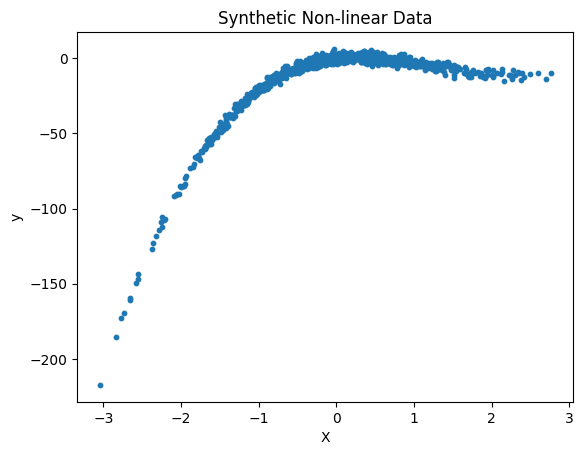

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve


# Generate synthetic data
np.random.seed(0)
X = np.random.normal(0, 1, (1000, 1))
print(X.shape)
y = 6 * X - 12 * (X ** 2) + 3.14 * (X ** 3) + np.random.normal(0, 2, (1000, 1))
print(y.shape)

# Visualize the data
plt.scatter(X, y, s=10)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Non-linear Data')
plt.show()


In [30]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for polynomial regression
model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('scaling', StandardScaler()),
    ('linear_regression', LinearRegression())
])

model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 4.3903678250748


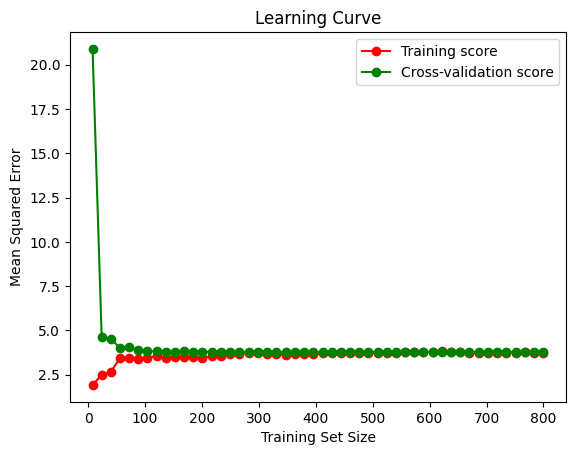

In [31]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.01, 1.0, 50), cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


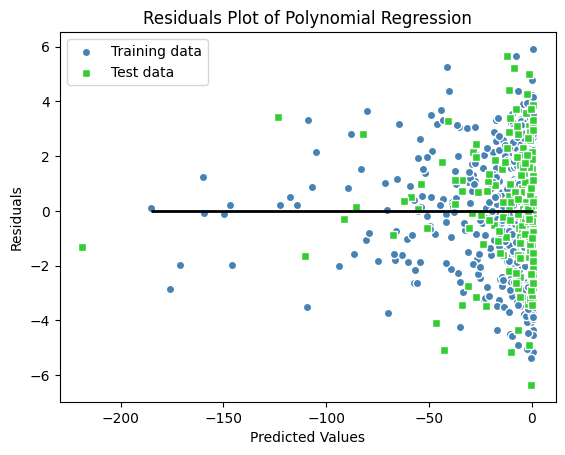

In [32]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=np.min(y_train_pred), xmax=np.max(y_train_pred), color='black', lw=2)
plt.title('Residuals Plot of Polynomial Regression')
plt.show()
